This program is used for developing new plotting scripts. Once scripts work properly and can be iterated over, this notebook is imported to a script, where it will be run for most cases. Therefore, code here is not normally used and up to date.

In [69]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cpf
import numpy as np
from metpy.plots import ctables
import pygrib
import matplotlib.colors as colors

In [70]:
hr = 36
dhrrr = "/scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2019052000_3km_hrrrphys/2019052000/postprd/"
drap = "/scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2019052000_3km_rapphys/2019052000/postprd/"
nat_prs = "natlev"
# set filepaths
if hr < 10:
    dgrib_h = f"{dhrrr}rrfs.t00z.{nat_prs}.f00{hr}.rrfs_conuscompact_3km.grib2"
    dgrib_r = f"{drap}rrfs.t00z.{nat_prs}.f00{hr}.rrfs_conuscompact_3km.grib2"
else:
    dgrib_h = f"{dhrrr}rrfs.t00z.{nat_prs}.f0{hr}.rrfs_conuscompact_3km.grib2"
    dgrib_r = f"{drap}rrfs.t00z.{nat_prs}.f0{hr}.rrfs_conuscompact_3km.grib2"

In [71]:
grbs_h = pygrib.open(dgrib_h)
grbs_r = pygrib.open(dgrib_r)

In [72]:
tot_accu_h = grbs_h[1374]
tot_accu_r = grbs_r[1374]
nonc_accu_h = grbs_h[1376]
nonc_accu_r = grbs_r[1376]

In [73]:
lat, lon = tot_accu_h.latlons()

In [75]:
valid_time = tot_accu_h.validDate

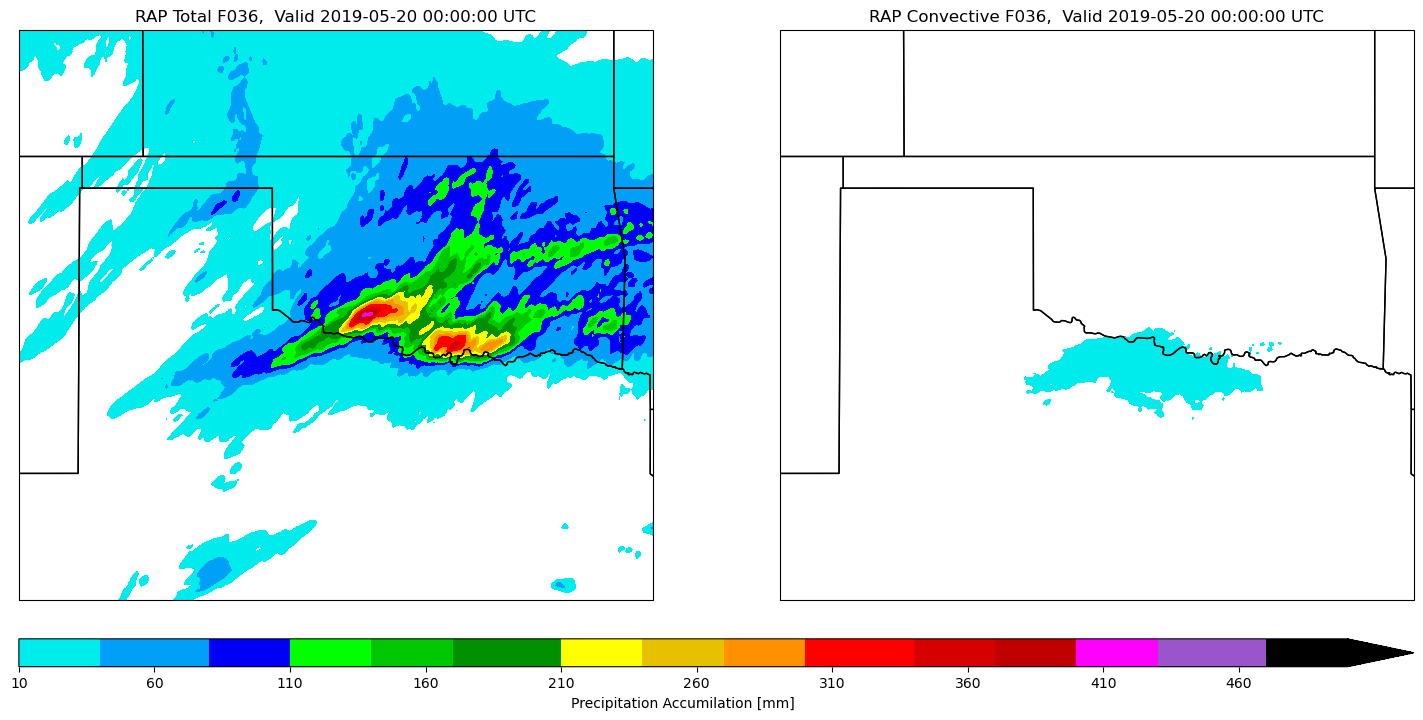

In [76]:
# Define your custom colorbar bounds
cbar_min = 10
cbar_max = 500

clevs = np.linspace(cbar_min, cbar_max, 50)

colors = ctables.registry.get_colortable('NWSReflectivity')

# create plot
fig, ax = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(18,10))
# mapping
plt_area = [-104, -94, 30, 39] # W, E, S, N
for i, iax in enumerate(ax):
    iax.coastlines()
    iax.add_feature(cpf.BORDERS)
    iax.add_feature(cpf.STATES)
    iax.set_extent(plt_area)
# plot
c0 = ax[0].contourf(lon, lat, tot_accu_r.values, 
                    clevs,transform=ccrs.PlateCarree(), 
                    cmap=colors, extend='max')
c1 = ax[1].contourf(lon, lat, tot_accu_r.values - nonc_accu_r.values, 
                    clevs, transform=ccrs.PlateCarree(), 
                    cmap=colors, extend='max')

# pretty up
ax[0].set_title(f"RAP Total F0{hr},  Valid {valid_time} UTC")
ax[1].set_title(f"RAP Convective F0{hr},  Valid {valid_time} UTC")

# Add colorbar
cbar = fig.colorbar(c0, ax=ax, orientation='horizontal', extend=True, pad=0.05, aspect=50)
cbar.set_label('Precipitation Accumilation [mm]')

plt.show()
# plt.savefig(f"/scratch2/BMC/fv3lam/Robby.Frost/figures/20190520/td2m_sidebyside_f{hr}.png")
plt.close()